<a href="https://colab.research.google.com/github/marttech26/FreeCodeCamp-Pandas-Real-Life-Example/blob/master/washingMachineFuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Installing modules

!pip install numpy
!pip install scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
# define inputs/outputs and their ranges
# here we have four variable
#   - type of clothes
#   - amount of clothes
#   - amount of water
#   - Quantity of detergent

# input variables
cloth_type = ctrl.Antecedent(np.arange(0,11,1), 'cloth_type')
amount = ctrl.Antecedent(np.arange(0,11,1), 'amount')
# output variables
water = ctrl.Consequent(np.arange(0,11,1), 'water')
detergent = ctrl.Consequent(np.arange(0,11,1), 'detergent')

In [ ]:
# after defining ipyts/outputs and their ranges, we the create memebership functions
# trimf = trinanle
# trapmf - trapezoidal
# gaussmf - gauss
# automf

# Membership functions for cloth_type
cloth_type['delicate'] = fuzz.trimf(cloth_type.universe,[0 ,0 ,5])
cloth_type['normal'] = fuzz.trimf(cloth_type.universe,[0 ,5 ,10])
cloth_type['heavy'] = fuzz.trimf(cloth_type.universe,[5 ,10 ,10])

# Membership functions for amount
amount['empty'] = fuzz.trimf(amount.universe,[0 ,0 ,3])
amount['small'] = fuzz.trimf(amount.universe,[0 ,3 ,6])
amount['medium'] = fuzz.trimf(amount.universe,[3 ,6 ,9])
amount['large'] = fuzz.trimf(amount.universe,[6 ,9 ,10])
amount['full'] = fuzz.trimf(amount.universe,[9 ,10 ,10])

# Membership functions for water
water['none'] = fuzz.trimf(water.universe,[0 ,0 ,0])
water['low'] = fuzz.trimf(water.universe,[0 ,0 ,4])
water['medium'] = fuzz.trimf(water.universe,[2 ,5.5 ,9])
water['high']= fuzz.trimf(water.universe,[7.5 ,10, 10])

# Membership functions for detergent
detergent['none'] = fuzz.trapmf(detergent.universe, [-2, -2, -1, 0])
detergent['low'] = fuzz.trapmf(detergent.universe, [-1, 0, 2, 4])
detergent['medium'] = fuzz.trapmf(detergent.universe, [2, 4, 6, 8])
detergent['high'] = fuzz.trapmf(detergent.universe, [6, 8, 10, 12])



In [ ]:
# Rules
rule1=ctrl.Rule((
    cloth_type ['delicate'] & amount['empty'] |
    cloth_type ['normal'] & amount['empty'] |
    cloth_type ['heavy'] & amount['empty']
    ),[water ['none'], detergent ['none']])

rule2=ctrl.Rule((
    cloth_type ['delicate'] & amount['small'] |
    cloth_type ['normal'] & amount['small']
    ),[water ['low'], detergent ['low']])


rule3=ctrl.Rule(cloth_type ['delicate'] & amount['medium'],[water ['medium'], detergent ['low']])

rule4=ctrl.Rule((
    cloth_type ['delicate'] & amount['large'] |
    cloth_type ['normal'] & amount['medium'] |
    cloth_type ['heavy'] & amount['small']
    ),[water ['medium'], detergent ['medium']])

rule5=ctrl.Rule((
    cloth_type ['delicate'] & amount['full'] |
    cloth_type ['heavy'] & amount['medium']
    ),[water ['high'], detergent ['medium']])

rule6=ctrl.Rule((
    cloth_type ['normal'] & amount['large'] |
    cloth_type ['normal'] & amount['full'] |
    cloth_type ['heavy'] & amount['large'] |
    cloth_type ['heavy'] & amount['full']
    ),[water ['high'], detergent ['high']])


# rule2=ctrl.Rule(cloth_type ['normal'] & amount['small'],[water ['medium'], detergent ['medium']])
# rule3=ctrl.Rule(cloth_type ['normal'] & amount['medium'],[water ['medium'], detergent ['medium']])
# rule3=ctrl.Rule(cloth_type ['heavy'],[water ['high'], detergent ['high']])
# rule4=ctrl.Rule(amount ['empty'],[water ['none'], detergent ['none']])
# rule5 = ctrl.Rule(amount['small'], [water['low'], detergent['low']])
# rule6=ctrl.Rule(amount ['large'],[water ['high'], detergent ['high']])
# rule6 = ctrl.Rule(amount['small'], ~detergent['high'])
# rule5=ctrl.Rule(amount ['small'],(fuzz.Not(water['high']),fuzz.Not(detergent['high'])))
# rule6 = ctrl.Rule(amount['small'].__invert__(), (fuzz.Not(water['low']) & fuzz.Not(detergent['low'])))

In [ ]:
washing_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6])

In [ ]:
washing_sim = ctrl.ControlSystemSimulation(washing_ctrl)

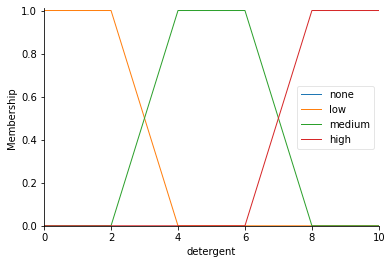

In [ ]:
detergent.view()

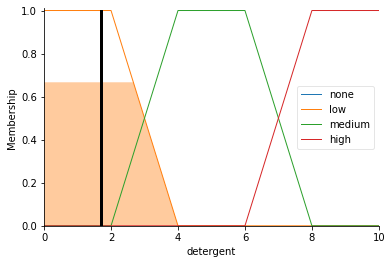

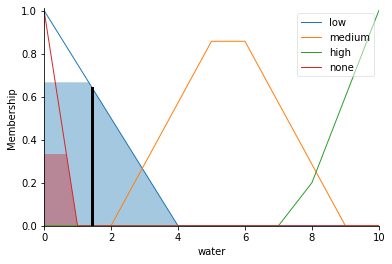

In [ ]:
washing_sim.input['cloth_type'] = 1
washing_sim.input['amount'] = 2
washing_sim.compute()
detergent.view(sim=washing_sim)
water.view(sim=washing_sim)